In [1]:
%matplotlib inline
import skyflux as sf

Missing flux value for: GLEAM J202818-254302 at frequency: 204 MHz.
Missing flux value for: GLEAM J202818-254302 at frequency: 212 MHz.
Missing flux value for: GLEAM J202818-254302 at frequency: 220 MHz.
Missing flux value for: GLEAM J202818-254302 at frequency: 227 MHz.
Missing spectral index for: GLEAM J202818-254302


//anaconda3/envs/hera/lib/python3.8/site-packages/spin1_beam_model/jones_matrix_field.py:18: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  self.pos1_Elm_samples = h5f["pos1_Elm"].value
//anaconda3/envs/hera/lib/python3.8/site-packages/spin1_beam_model/jones_matrix_field.py:19: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  self.neg1_Elm_samples = h5f["neg1_Elm"].value
//anaconda3/envs/hera/lib/python3.8/site-packages/spin1_beam_model/jones_matrix_field.py:20: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  self.freq_nodes = h5f["frequencies"].value
//anaconda3/envs/hera/lib/python3.8/site-packages/spin1_beam_model/jones_matrix_field.py:21: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  self.L_model = h5f["spatial_bandlimit"].value
//anaconda3/envs/hera/lib/python3.8/site-packages/spin1_beam_model/jones_matrix_field.py:22: H5pyDeprec

delta_nu_in is 1000000.0


In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [8]:
# 100 points for a day
list_lst = np.linspace(0, 2 * np.pi, 100)
def day_dict(ra, dec): #inefficient; don't care
    """
    @ra [float, radians]
    @dec [float, radians]
    """
    list_ha = []
    list_az = []
    list_alt = []
    for lst in list_lst:
        ha = lst - ra
        if ha < 0:
            ha += 2 * np.pi
        list_ha.append(ha)
        
        az, alt = sf.rot.eq_to_topo(
            ra, dec, lst=lst, radians=True
        )
        list_az.append(az)
        list_alt.append(alt)
    
    day_dict = {}
    day_dict['ha'] = np.array(list_ha)
    day_dict['az'] = np.array(list_az)
    day_dict['alt'] = np.array(list_alt)
    
    return day_dict

In [9]:
import random
obj_idx = int(random.random() * len(sf.catalog.obj_catalog))
print(obj_idx)
obj = sf.catalog.obj_catalog[obj_idx]

631


In [11]:
obj_ra = np.radians(obj.ra_angle)
obj_dec = np.radians(obj.dec_angle)
obj_day = day_dict(obj_ra, obj_dec)
obj_day['ha']

array([0.1593042 , 0.22277072, 0.28623724, 0.34970376, 0.41317027,
       0.47663679, 0.54010331, 0.60356983, 0.66703635, 0.73050286,
       0.79396938, 0.8574359 , 0.92090242, 0.98436894, 1.04783546,
       1.11130197, 1.17476849, 1.23823501, 1.30170153, 1.36516805,
       1.42863457, 1.49210108, 1.5555676 , 1.61903412, 1.68250064,
       1.74596716, 1.80943367, 1.87290019, 1.93636671, 1.99983323,
       2.06329975, 2.12676627, 2.19023278, 2.2536993 , 2.31716582,
       2.38063234, 2.44409886, 2.50756538, 2.57103189, 2.63449841,
       2.69796493, 2.76143145, 2.82489797, 2.88836449, 2.951831  ,
       3.01529752, 3.07876404, 3.14223056, 3.20569708, 3.26916359,
       3.33263011, 3.39609663, 3.45956315, 3.52302967, 3.58649619,
       3.6499627 , 3.71342922, 3.77689574, 3.84036226, 3.90382878,
       3.9672953 , 4.03076181, 4.09422833, 4.15769485, 4.22116137,
       4.28462789, 4.34809441, 4.41156092, 4.47502744, 4.53849396,
       4.60196048, 4.665427  , 4.72889351, 4.79236003, 4.85582

Text(0, 0.5, 'Hour-angle [rad]')

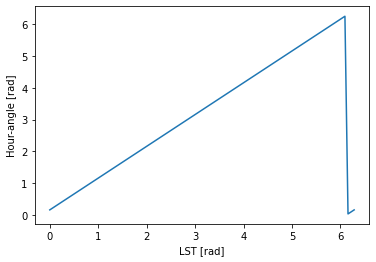

In [12]:
plt.plot(list_lst, obj_day['ha'])
plt.xlabel("LST [rad]")
plt.ylabel("Hour-angle [rad]")

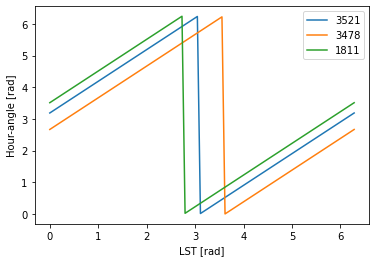

In [13]:
obj_count = 3

obj_dicts = []

for i in range(0, obj_count):
    s_idx = int(random.random() * len(sf.catalog.obj_catalog))
    s = sf.catalog.obj_catalog[s_idx]
    s_ra = np.radians(s.ra_angle)
    s_dec = np.radians(s.dec_angle)
    
    obj_dicts.append(day_dict(s_ra, s_dec)['ha'])
    
    plt.plot(list_lst, obj_dicts[i], label=str(s_idx))

plt.xlabel("LST [rad]")
plt.ylabel("Hour-angle [rad]")
plt.legend()
plt.show()

In [ ]:
# I want to have a plot to see how the eq2topo conversion changes over a full LST day,
# given a single source's base-line ra and dec